In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
ndf = pd.get_dummies(df,drop_first=True)

In [7]:
ndf

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='RestingBP', ylabel='Density'>

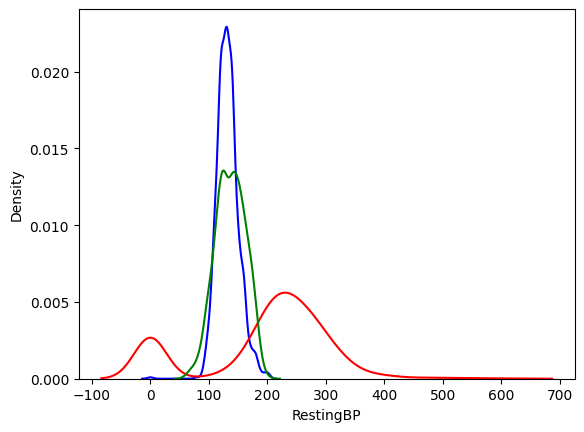

In [18]:
sns.kdeplot(df['RestingBP'], color='blue', label='Original RestingBP')
sns.kdeplot(df['Cholesterol'], color='red', label='Original RestingBP')
sns.kdeplot(df['MaxHR'], color='green', label='Original RestingBP')

In [23]:
df.shape

(918, 12)

In [24]:
def remove_outliers_zscore(data, column, lower_threshold=-3, upper_threshold=3):
    z_scores = stats.zscore(data[column])
    return data[(z_scores > lower_threshold) & (z_scores < upper_threshold)]

In [25]:
columns_to_clean = ['RestingBP', 'MaxHR', 'Cholesterol', 'Oldpeak']

df_cleaned = df.copy()
for column in columns_to_clean:
    df_cleaned = remove_outliers_zscore(df_cleaned, column)

In [26]:
df_cleaned.shape

(899, 12)

In [29]:
inp = df_cleaned.drop('HeartDisease',axis='columns')

In [43]:

out = df_cleaned['HeartDisease']

In [34]:
inp = pd.get_dummies(inp)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(inp)


In [85]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [47]:
par = {'n_estimators':[1,3,5,10,20]}

In [48]:
cv = GridSearchCV(RandomForestClassifier(),par,cv=5)

In [49]:
cv.fit(X_scaled,out)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 3, 5, 10, 20]})

In [72]:
cv.fit(X_pca,out)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 3, 5, 10, 20]})

In [50]:
cv.best_score_

np.float64(0.8186157666045935)

In [73]:
cv.best_score_

np.float64(0.6307076350093109)

In [51]:
df2 = pd.DataFrame(cv.cv_results_)

In [52]:
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004685,0.003373,0.000818,4.100837e-04,1,{'n_estimators': 1},0.822222,0.733333,0.766667,0.727778,0.709497,0.751899,0.039719,5
1,0.004000,0.000002,0.000000,0.000000e+00,3,{'n_estimators': 3},0.827778,0.833333,0.783333,0.766667,0.698324,0.781887,0.048927,4
2,0.005200,0.000400,0.000600,4.900182e-04,5,{'n_estimators': 5},0.850000,0.822222,0.844444,0.788889,0.709497,0.803011,0.051455,3
3,0.009724,0.000391,0.000600,4.899793e-04,10,{'n_estimators': 10},0.838889,0.788889,0.861111,0.816667,0.731844,0.807480,0.044752,2
4,0.018000,0.000632,0.001000,2.431402e-07,20,{'n_estimators': 20},0.861111,0.777778,0.850000,0.850000,0.754190,0.818616,0.043805,1


In [53]:
from sklearn.linear_model import LogisticRegression

In [58]:
par = {'C':[1,2,3,5,10]}
cv2 = GridSearchCV(LogisticRegression(),par,cv=5)
cv2.fit(X_scaled,out)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 5, 10]})

In [75]:
par = {'C':[1,2,3,5,10]}
cv2 = GridSearchCV(LogisticRegression(),par,cv=5)
cv2.fit(X_pca,out)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 5, 10]})

In [76]:
df23 = pd.DataFrame(cv2.cv_results_)

In [69]:
df23 = pd.DataFrame(cv2.cv_results_)

In [77]:
df23

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003964,0.000517,0.000622,0.000510,1,{'C': 1},0.800000,0.738889,0.794444,0.811111,0.782123,0.785313,0.025020,1
1,0.003976,0.001299,0.001035,0.000047,2,{'C': 2},0.794444,0.738889,0.788889,0.811111,0.782123,0.783091,0.024093,2
2,0.003385,0.000527,0.000622,0.000509,3,{'C': 3},0.794444,0.738889,0.788889,0.811111,0.782123,0.783091,0.024093,2
3,0.003216,0.000405,0.000584,0.000478,5,{'C': 5},0.794444,0.738889,0.788889,0.811111,0.782123,0.783091,0.024093,2
4,0.003208,0.000397,0.000409,0.000500,10,{'C': 10},0.794444,0.738889,0.788889,0.811111,0.782123,0.783091,0.024093,2


In [71]:
df23

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002556,0.000470,0.000226,0.000453,1,{'C': 1},0.616667,0.644444,0.638889,0.772222,0.603352,0.655115,0.060413,1
1,0.003399,0.001020,0.000401,0.000491,2,{'C': 2},0.616667,0.644444,0.638889,0.772222,0.603352,0.655115,0.060413,1
2,0.054390,0.104261,0.000400,0.000490,3,{'C': 3},0.616667,0.644444,0.638889,0.772222,0.603352,0.655115,0.060413,1
3,0.001800,0.000401,0.000400,0.000490,5,{'C': 5},0.616667,0.644444,0.638889,0.772222,0.603352,0.655115,0.060413,1
4,0.001800,0.000400,0.000400,0.000490,10,{'C': 10},0.616667,0.644444,0.638889,0.772222,0.603352,0.655115,0.060413,1


In [79]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_pca = pca.fit_transform(inp)
X_pca.shape

(899, 3)

In [80]:
pca.explained_variance_ratio_


array([0.92106286, 0.05065082, 0.02257983])

In [67]:
X_pca

array([[ 93.12969956,  29.68273029],
       [-16.33756859,  14.80745042],
       [ 82.66967831, -38.904359  ],
       ...,
       [-68.22673696, -17.70468041],
       [ 40.02780323,  33.47210858],
       [-20.61235115,  37.62108253]])

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(inp)
X_pca.shape

(899, 5)

In [100]:
tr1,ts1,tr2,ts2 = train_test_split(inp,out,test_size=0.2)

In [88]:
model = RandomForestClassifier()

In [89]:
model.fit(tr1,tr2)

RandomForestClassifier()

In [90]:
model.score(ts1,ts2)

0.6777777777777778

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
model = KNeighborsClassifier(n_neighbors=4)

In [117]:
model.fit(tr1,tr2)

KNeighborsClassifier(n_neighbors=4)

In [118]:
model.score(ts1,ts2)

0.6722222222222223

In [119]:
inp

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,False,True,False,False,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,False,True,True,False,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,False,True,True,False,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,True,False,False,True,False,False,True,False,False,True,False,False,True,False
